<a href="https://colab.research.google.com/github/Coldman22/Coldman22-biclustering/blob/main/Untitled7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A demo of the Spectral Co-Clustering algorithm

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from sklearn.datasets import make_biclusters
from sklearn.cluster import SpectralCoclustering
from sklearn.metrics import consensus_score

In [3]:
data, rows, columns = make_biclusters(
    shape=(300, 300), n_clusters=5, noise=5, shuffle=False, random_state=0
)

Text(0.5, 1.05, 'Original dataset')

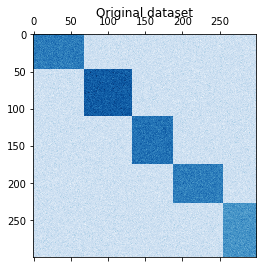

In [4]:
plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Original dataset")

In [5]:
# shuffle clusters
rng = np.random.RandomState(0)
row_idx = rng.permutation(data.shape[0])
col_idx = rng.permutation(data.shape[1])
data = data[row_idx][:, col_idx]

Text(0.5, 1.05, 'Shuffled dataset')

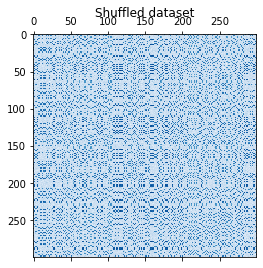

In [6]:
plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Shuffled dataset")

In [7]:
model = SpectralCoclustering(n_clusters=5, random_state=0)
model.fit(data)
score = consensus_score(model.biclusters_, (rows[:, row_idx], columns[:, col_idx]))

In [8]:
print("consensus score: {:.3f}".format(score))

consensus score: 1.000


In [9]:
fit_data = data[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]

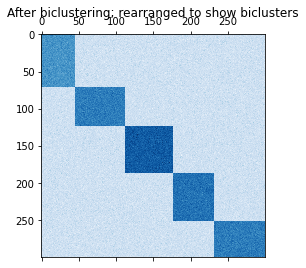

In [10]:
plt.matshow(fit_data, cmap=plt.cm.Blues)
plt.title("After biclustering; rearranged to show biclusters")

plt.show()